In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-02-16 08:39:18.335759


<h1>Seaborn</h1>

Seaborn on matplotlibin päälle rakennettu grafiikka-kirjasto, joka tarjoaa helppoja tapoja kaavioiden luontiin. Kaavioita voi muotoilla kuten mitä tahansa matplotlib-kaavioita, joten muotoilu edellyttää matplotlib-osaamista. Katso esimerkiksi https://tilastoapu.wordpress.com/2019/07/02/kuviot-ja-kaaviot-pythonilla/

Tässä notebooksissa on esimerkkejä seuraavista kaaviolajeista:

- countplot - lukumääräyhteeveto kategoriselle muuttujalle
- histplot -  luokiteltu jakauma määrälliselle muuttujalle
- barplot - virhemarginaaleilla varustettu pylväskaavio keskiarvoista
- boxplot - viiden luvun yhteeveto
- scatterplot - hajontakaavio, joka havainnollistaa kahden määrällisen muuttujan riippuvuutta
- jointplot - hajontakaavio täydennettynä mukana olevien muuttujien jakaumilla
- pairplot - useiden muuttujaparien hajontakaaviot samalla kertaa
- heatmap - tällä voin havainnollistaa esimerkiksi korrelaatiomatriisia

Tässä notebookissa on myös esimerkkejä usean kaavion kuvioista käyttäen catplot-, displot- ja relplot-toimintoja.

Seaborn-kaavioita on helppo laatia, jos ymmärtää keskeiset parametrit:

- x
- y
- hue (minkä muuttujan mukaan värierottelu)
- data
- row (catplot, displot ja relplot yhteydessä)
- col (catplot, displot ja relplot yhteydessä)
- kind (kaaviolaji catplot, displot ja relplot yhteydessä)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kaavioiden tyylin valinta
sns.set_style("whitegrid")

In [3]:
# Esimerkkidata ravintolaseurueiden tipeistä
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<h2>countplot</h2>

Sopii kategoristen muuttujien lukumääräyhteenvetoihin.

https://seaborn.pydata.org/generated/seaborn.countplot.html

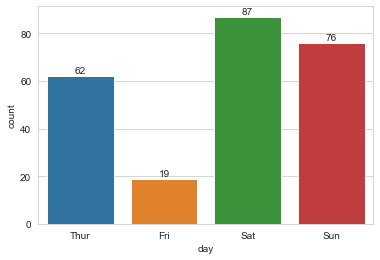

In [4]:
sns.countplot(x = 'day', data = tips)

# Lukumäärät pylväiden yläpuolelle
for bar in plt.gca().patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = f'{y:.0f}'
    plt.text(x = x, y = y + 0.3, s = label, va = 'bottom', ha = 'center')

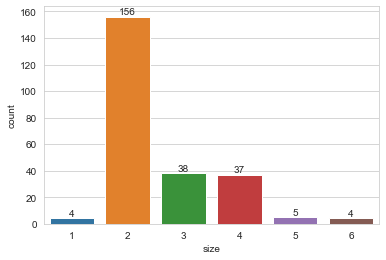

In [5]:
# Eri kokoisten seurueiden lukumäärät
sns.countplot(x = 'size', data = tips)

for bar in plt.gca().patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = f'{y:.0f}'
    plt.text(x = x, y = y + 0.3, s = label, va = 'bottom', ha = 'center')

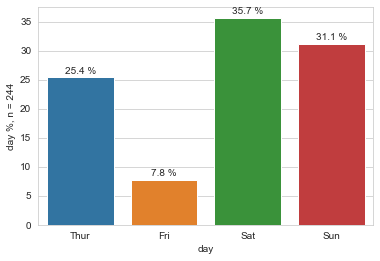

In [6]:
# Prosenttien esittäminen onnistuu helpoiten barplot-kaaviona
# Jos muuttuja on ei-numeerinen, niin y:ksi on sijoitettava jokin numeerinen muuttuja, 
# jolla olla sama määrä havaintoja!

n = tips['day'].count()
sns.barplot(x = 'day', y = 'size', data = tips, estimator = lambda x: len(x) / n * 100)
plt.ylabel(f'day %, n = {n}')

# Prosentit pylväiden yläpuolelle
for bar in plt.gca().patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = f'{y:.1f} %'
    plt.text(x = x, y = y + 0.3, s = label, va = 'bottom', ha = 'center')

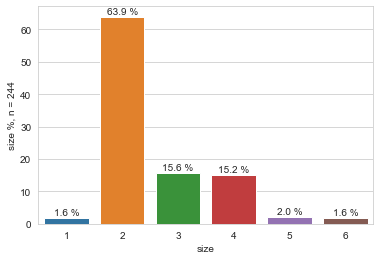

In [7]:
# Prosentit
n = tips['size'].count()
sns.barplot(x = 'size', y = 'size', data = tips, estimator = lambda x: len(x) / n * 100)
plt.ylabel( f'size %, n = {n}')

# Prosentit pylväiden yläpuolelle
for bar in plt.gca().patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = f'{y:.1f} %'
    plt.text(x = x, y = y + 0.3, s = label, va = 'bottom', ha = 'center')

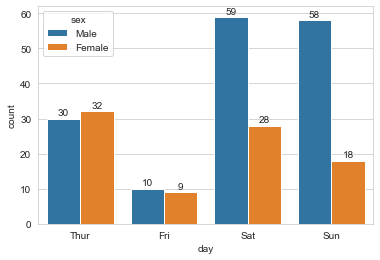

In [8]:
# Sukupuolijakauma eri viikonpäivinä
sns.countplot(x = 'day', hue = 'sex', data = tips)

for bar in plt.gca().patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = f'{y:.0f}'
    plt.text(x = x, y = y + 0.3, s = label, va = 'bottom', ha = 'center')

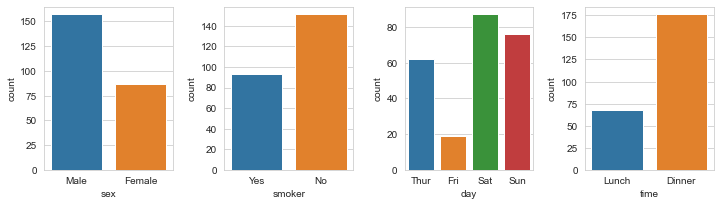

In [9]:
# Kategoristen muuttujien lukumääräyhteenvedot

kategoriset = ['sex', 'smoker', 'day', 'time']

# Neljän kaavion kokoelma
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 3))

for i, var in enumerate(kategoriset):
    sns.countplot(x = var, data = tips, ax = axes[i])

# Kaavioiden välinen tyhjä tila
fig.subplots_adjust(wspace = 0.4)

countplot sopii käytettäväksi <b>catplot</b>-toiminnon yhteydessä (<b>kind = 'count'</b>). Tällöin voin esittää usean kaavion kokonaisuuksia.

https://seaborn.pydata.org/generated/seaborn.catplot.html

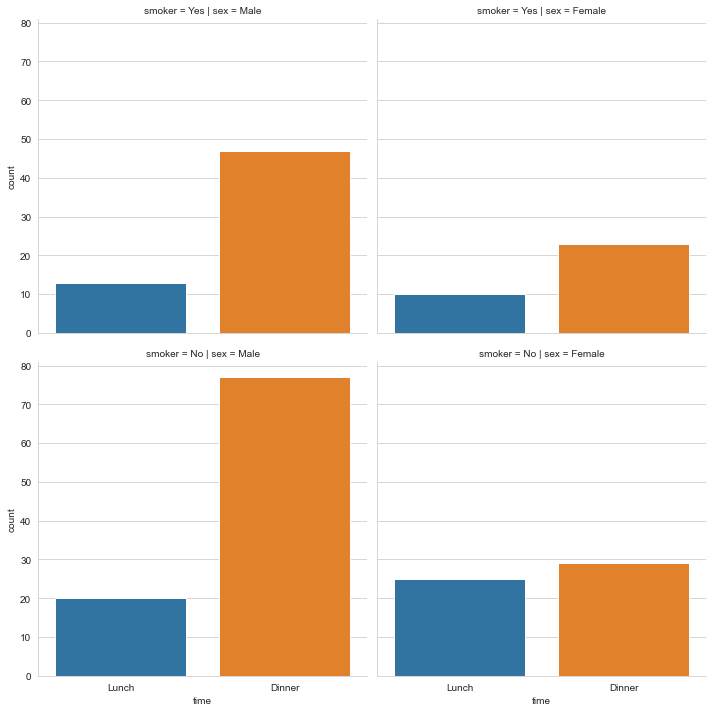

In [10]:
# Lounas- ja päivällisseurueiden lukumäärät sukupuolen ja tupakoinnin mukaan
sns.catplot(x = 'time', col = 'sex', row = 'smoker', data = tips, kind = 'count')

<h2>histplot</h2>

Sopii määrällisen muuttujan luokitellun jakauman esittämiseen.

https://seaborn.pydata.org/generated/seaborn.histplot.html

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

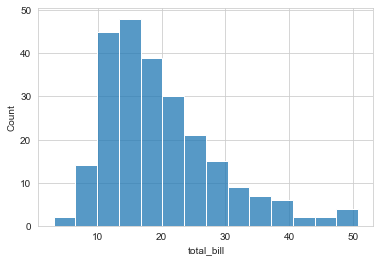

In [11]:
# Laskun loppusummien jakauma
sns.histplot(x = 'total_bill', data = tips)

Text(0, 0.5, 'Total_bill %, n = 244')

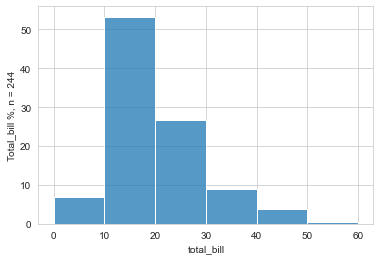

In [12]:
# Itse määritellyt luokkarajat, prosentit

n= tips['total_bill'].count()

sns.histplot(x = 'total_bill', data = tips, bins = [0, 10, 20, 30, 40, 50, 60], stat = 'percent')
plt.ylabel(f'Total_bill %, n = {n}')

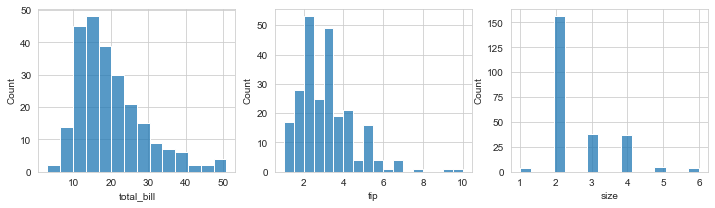

In [13]:
# Määrällisten muuttujien histogrammit

maaralliset = ['total_bill', 'tip', 'size']

# Kolmen kaavion kokoelma
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12,3))

for i, var in enumerate(maaralliset):
    sns.histplot(x = var, data = tips, ax = axes[i])

histplot sopii käytettäväksi <b>displot</b>-toiminnon yhteydessä. Tällöin voin esittää usean kaavion kokonaisuuksia.

https://seaborn.pydata.org/generated/seaborn.displot.html

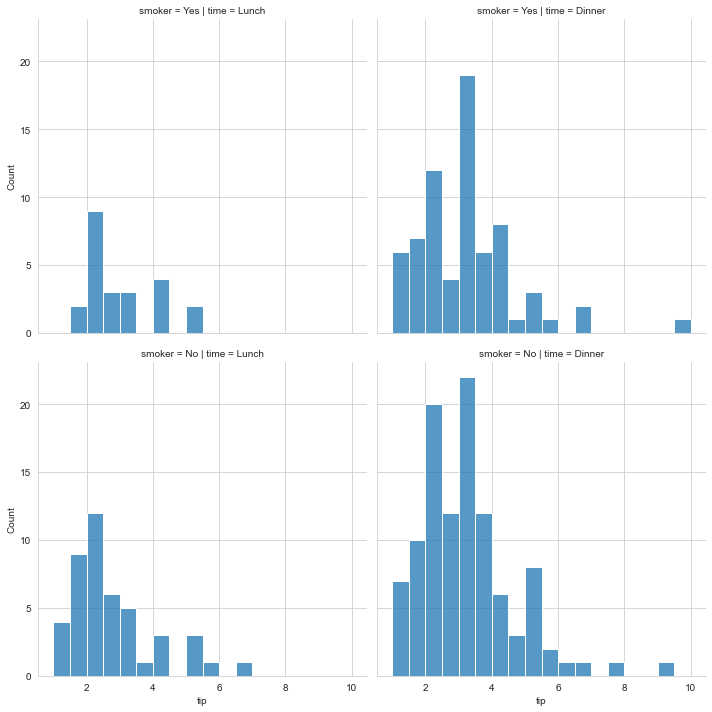

In [14]:
# tipin jakaumat tupakoinnin ja ajan mukaan
sns.displot(x = 'tip', row = 'smoker', col = 'time', data = tips)

<h2>barplot</h2>

Sopii keskiarvojen esittämiseen. Musta viiva havainnoillistaa virhemarginaalin (luottamusväli).

https://seaborn.pydata.org/generated/seaborn.barplot.html

<AxesSubplot:xlabel='day', ylabel='tip'>

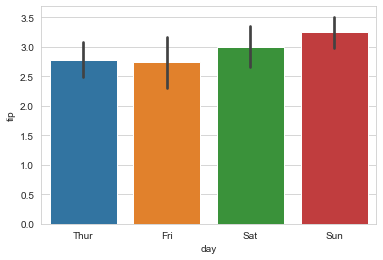

In [15]:
# Eri päivien tippien keskiarvot
sns.barplot(x = 'day', y = 'tip', data = tips)

<AxesSubplot:xlabel='day', ylabel='tip'>

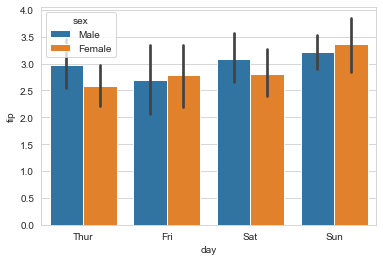

In [16]:
# Eri päivien tippien keskiarvot sukupuolen mukaan
sns.barplot(x = 'day', y = 'tip', hue = 'sex', data = tips)

barplot sopii käytettäväksi <b>catplot</b>-toiminnon yhteydessä. Tällöin voin esittää usean kaavion kokonaisuuksia.

https://seaborn.pydata.org/generated/seaborn.catplot.html

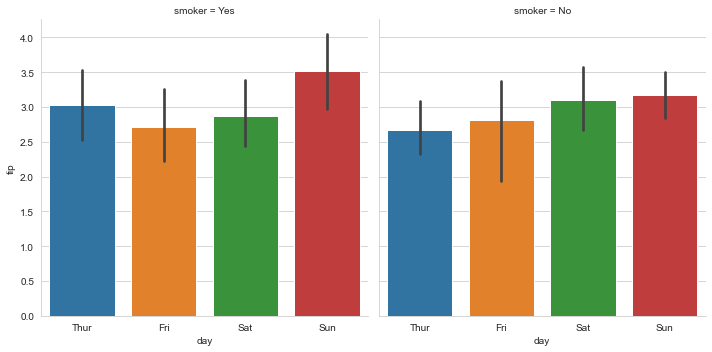

In [17]:
# Eri päivien tippien keskiarvot tupakoinnin mukaan
sns.catplot(x = 'day', y = 'tip', col = 'smoker', data = tips, kind = 'bar')

<h2>boxplot</h2>

Havainnollistaa viiden luvun yhteenvedon (pienin, alaneljännes, mediaani, yläneljännes, suurin). Lisäksi muista selvästi poikkeavat havainnot esitetään erillisinä pisteinä.

https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:xlabel='tip'>

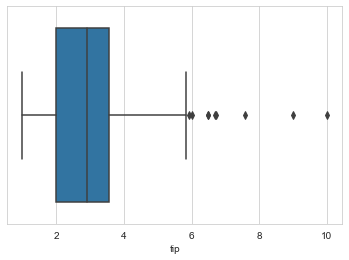

In [18]:
# Tipin suuruuden jakauma
sns.boxplot(x = 'tip', data = tips)

<AxesSubplot:xlabel='time', ylabel='tip'>

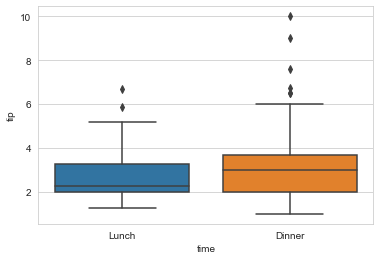

In [19]:
# Tipin suuruus lounas- ja päivällisseurueille
sns.boxplot(x = 'time', y = 'tip', data = tips)

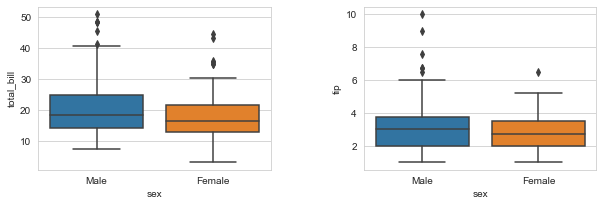

In [20]:
# boxplot() usealle muuttujalle (total_bill ja tip) sukupuolen mukaan

# Kahden kaavion kokoelma
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,3))

sns.boxplot(x = 'sex', y = 'total_bill', data = tips, ax = axes[0])
sns.boxplot(x = 'sex', y = 'tip', data = tips, ax = axes[1])

# Kaavioiden etäisyys toisistaan
fig.subplots_adjust(wspace = 0.4)

boxplot sopii käytettäväksi <b>catplot</b>-toiminnon yhteydessä. Tällöin voin esittää usean kaavion kokonaisuuksia.

https://seaborn.pydata.org/generated/seaborn.catplot.html

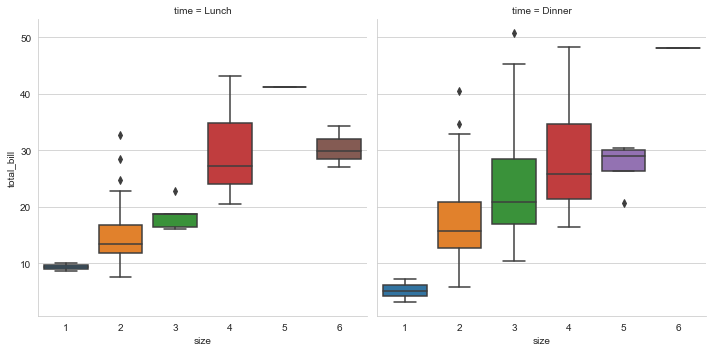

In [21]:
# Laskun loppusumma seurueen koon ja ajan mukaan
sns.catplot(x = 'size', y = 'total_bill', col = 'time', data = tips, kind = 'box')

<h2>scatterplot</h2>

Havainnollistaa kahden määrällisen muuttujan välisen riippuvuuden.

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

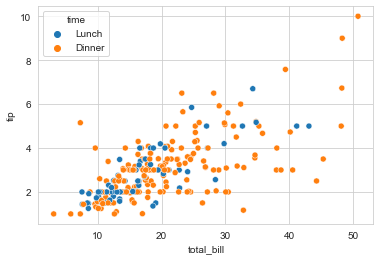

In [22]:
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'time', data = tips)

scatterplot sopii käytettäväksi <b>relplot</b>-toiminnon yhteydessä. Tällöin voin esittää usean kaavion kokonaisuuksia.

https://seaborn.pydata.org/generated/seaborn.relplot.html

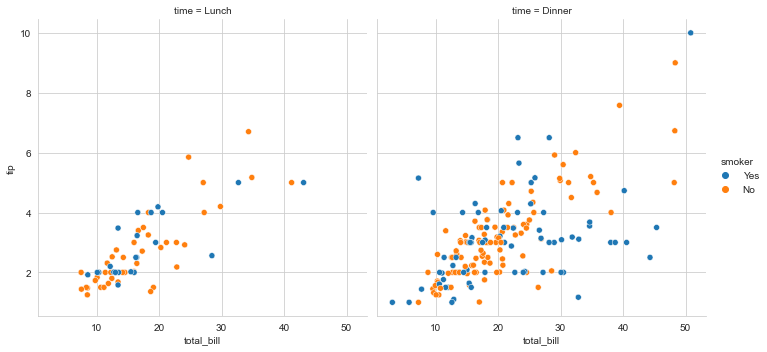

In [23]:
# Laskun loppusumma ajan mukaan. Värierottelu tupakoinnin mukaan.
sns.relplot(data = tips, x = 'total_bill', y = 'tip', col = 'time', hue = 'smoker', kind = 'scatter')

<h2>jointplot</h2>

Havainnollistaa kahden määrällisen muuttujan välisen riippuvuuden ja esittää samalla kummankin muuttujan jakaumat.

http://seaborn.pydata.org/generated/seaborn.jointplot.html

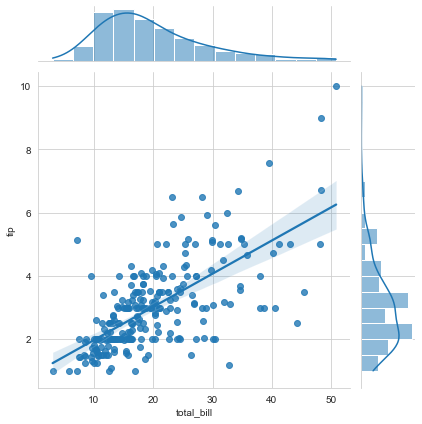

In [24]:
# Laskun loppusumman ja tipin välinen riippuvuus
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg')

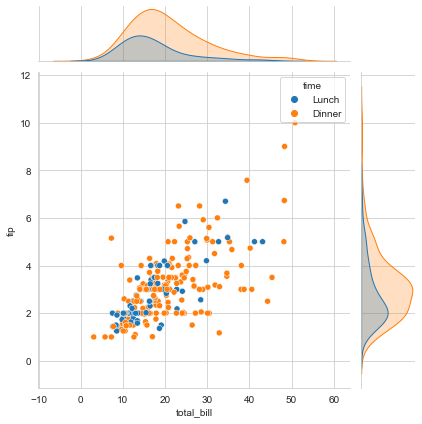

In [25]:
# Värierottelu ajan mukaan
sns.jointplot(x = 'total_bill', y = 'tip', hue = 'time', data = tips)

In [26]:
# Avaan vielä toisen datan, jossa on pisteitä eri osaamisista ja opintomenestyksestä
opintomenestys = pd.read_excel('https://taanila.fi/opintomenestys.xlsx')
opintomenestys.head()

,koehenkilö,verbaalinen,looginen,kielet,matematiikka,opintomenestys,sukupuoli
0,2,26,32,8.2,7,16,Nainen
1,3,29,33,9.6,5,17,Nainen
2,6,28,36,9.2,7,19,Nainen
3,7,23,34,7.2,7,14,Nainen
4,10,29,34,9.7,8,19,Nainen


In [27]:
# Pudotan tarpeettoman muuttujan pois
opintomenestys = opintomenestys.drop('koehenkilö', axis = 1)
opintomenestys

,verbaalinen,looginen,kielet,matematiikka,opintomenestys,sukupuoli
0,26,32,8.2,7,16,Nainen
1,29,33,9.6,5,17,Nainen
2,28,36,9.2,7,19,Nainen
3,23,34,7.2,7,14,Nainen
4,29,34,9.7,8,19,Nainen
5,28,35,9.6,7,18,Nainen
6,25,34,8.2,7,18,Nainen
7,28,36,9.2,9,17,Nainen
8,27,35,8.9,6,16,Nainen
9,26,34,7.9,7,15,Nainen


<h2>pairplot</h2>

Esittää hajontakaaviot kaikille numeerisille muuttujille.

https://seaborn.pydata.org/generated/seaborn.pairplot.html

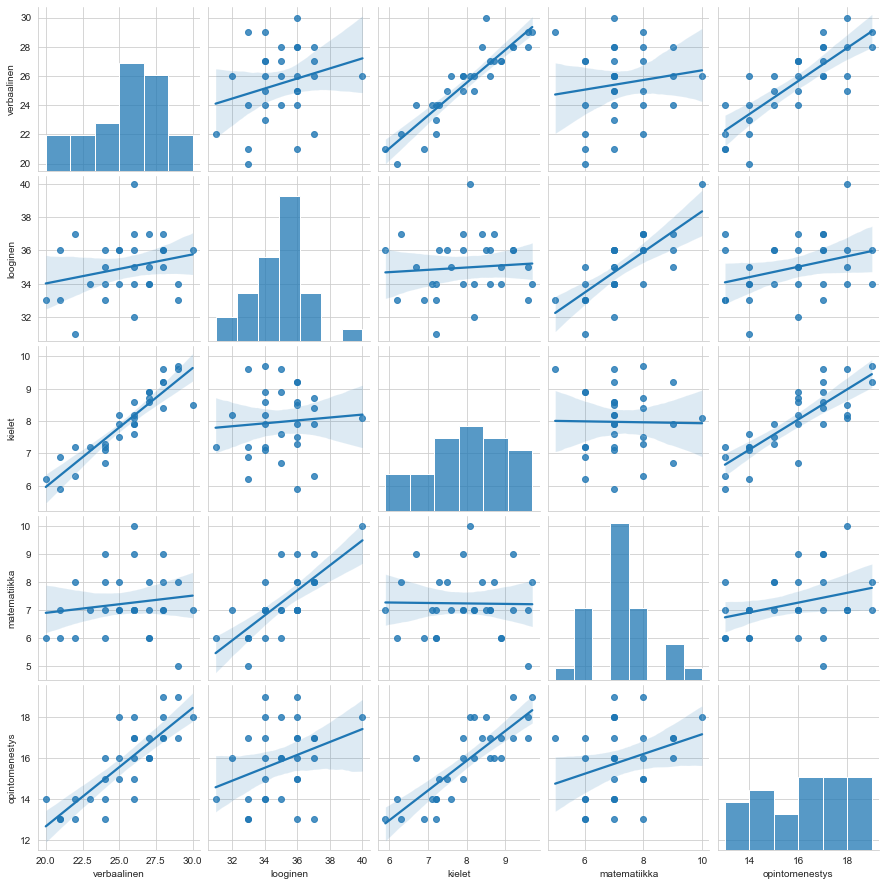

In [28]:
sns.pairplot(data = opintomenestys, kind = 'reg')

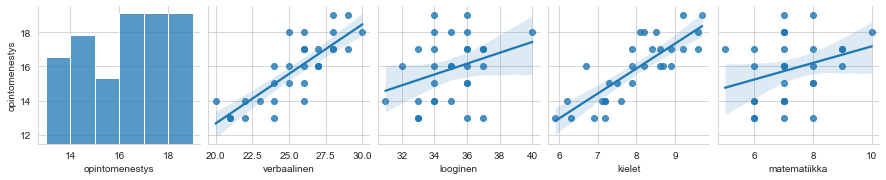

In [29]:
# Tässä tarkastelen ainoastaan opintomenestyksen riippuvuutta muista muuttujista
sns.pairplot(x_vars = ['opintomenestys', 'verbaalinen', 'looginen', 'kielet', 'matematiikka'], 
                       y_vars = ['opintomenestys'], data = opintomenestys, kind = 'reg')

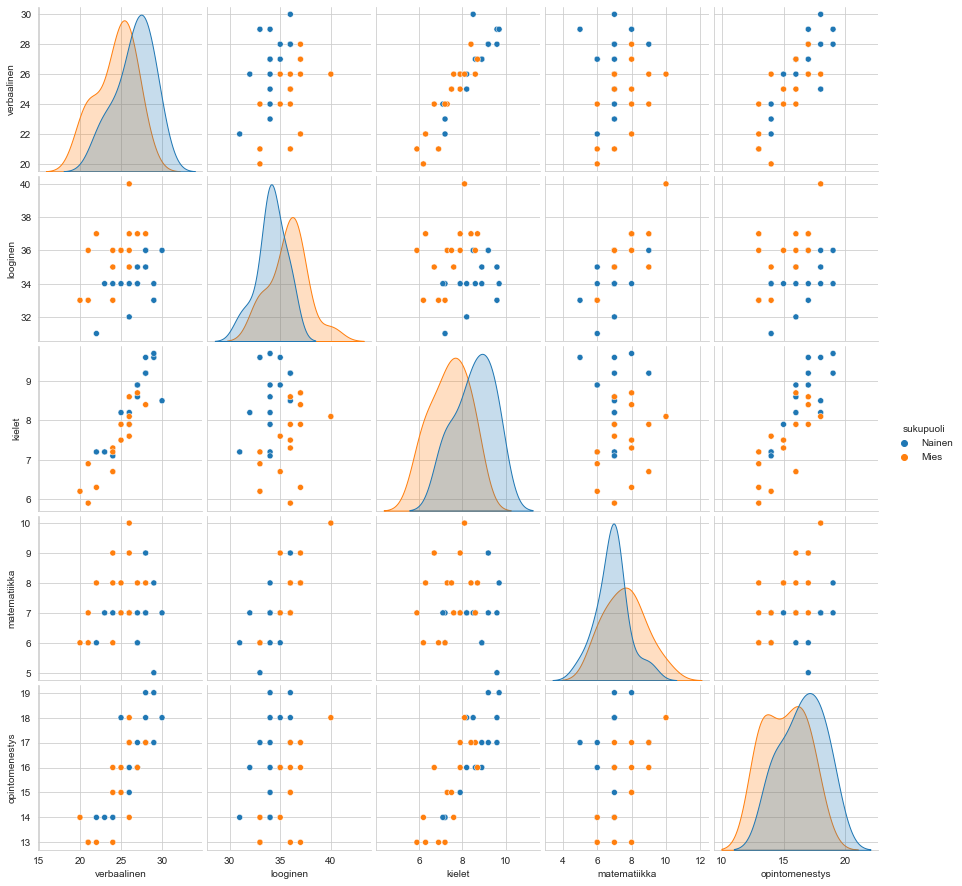

In [30]:
# Tässä teen värierottelun sukupuolen mukaan
sns.pairplot(data = opintomenestys, hue = 'sukupuoli')

<h2>heatmap</h2>

Sopii esimerkiksi korrelaatiomatriisin havainnollistamiseen.

https://seaborn.pydata.org/generated/seaborn.heatmap.html

<AxesSubplot:>

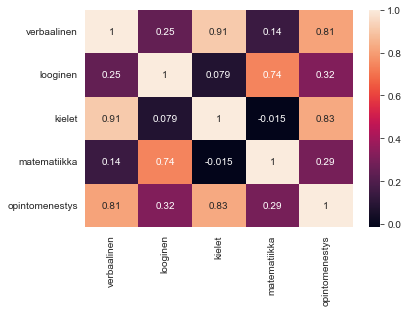

In [31]:
sns.heatmap(data = opintomenestys.corr(), annot = True)